# 🏠Project 02: House Price Prediction ML 🏘️

## Day 1: Project Setup + Initial EDA

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [78]:
# loading the dataset
df = pd.read_csv('/content/train.csv')
print('DataFrame loaded successfully')
df.head()

DataFrame loaded successfully


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
df.shape

(1460, 81)

In [81]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [82]:
# All columns of the dataset
all_cols=df.columns.tolist()
# creating a list for only numerical columns only
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# creating another list for object columns only
obj_cols = df.select_dtypes(include='object').columns.tolist()

In [83]:
# Displaying the list of all columns
print('All Columns: ',all_cols)
# Displaying the list of numerical columns
print('Numerical Columns: ',num_cols)
# Displaying the list of object columns
print('Object Columns or Category Columns: ',obj_cols)

All Columns:  ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

In [84]:
# Use .isnull().sum() to calculate the number of missing values per column.
null_values=df.isnull().sum()
total_null_values=df.isnull().sum().sum()
print('Total missing values in the DataFrame:', total_null_values)
# Filter the results to only show columns where null values are present.
print('Columns with missing values are listed below:')
null_values[null_values > 0]

Total missing values in the DataFrame: 7829
Columns with missing values are listed below:


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


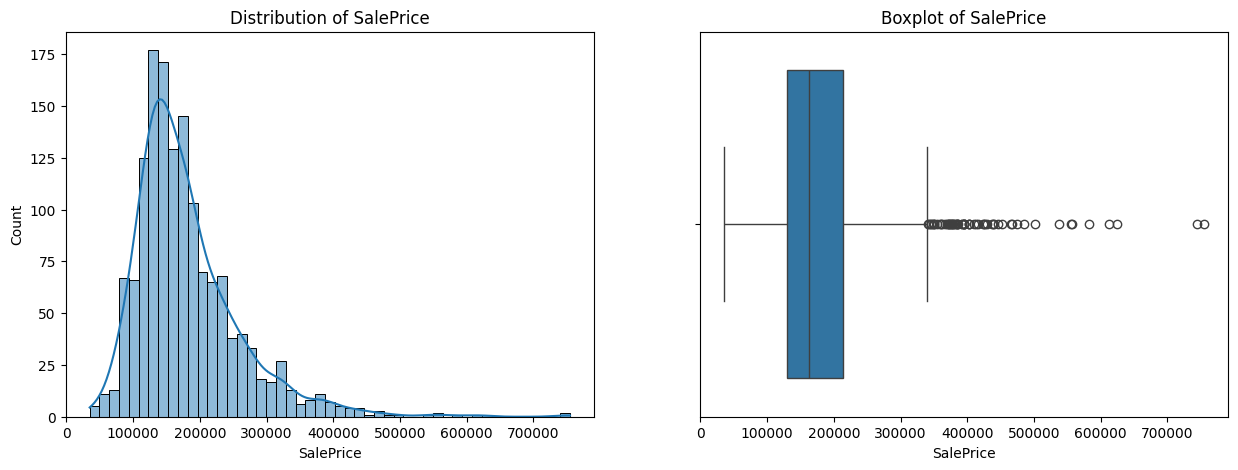

In [85]:
# Plot a histogram of the SalePrice to understand distribution.and a boxplot for detecting outliers
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

## Day 2: Data Cleaning + Missing Values

In [86]:
# removing irrelavent columns
df.drop(['Id', 'MiscFeature', 'Alley', 'PoolQC', 'Fence', 'FireplaceQu','MSSubClass'], axis=1, inplace=True)
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [87]:
# Review Missing Values Again
val_nullValues=df.isnull().sum()
val_nullValues[val_nullValues > 0]

,0
LotFrontage,259
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
GarageType,81


In [88]:
# from 7829 missing values it came to 1732
df.isnull().sum().sum()

np.int64(1732)

In [89]:
# Create a list of columns with missing values and number of missing entries.
cols_with_missing_values = val_nullValues[val_nullValues > 0].index.tolist()
print("Columns with missing values:",cols_with_missing_values)

Columns with missing values: ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


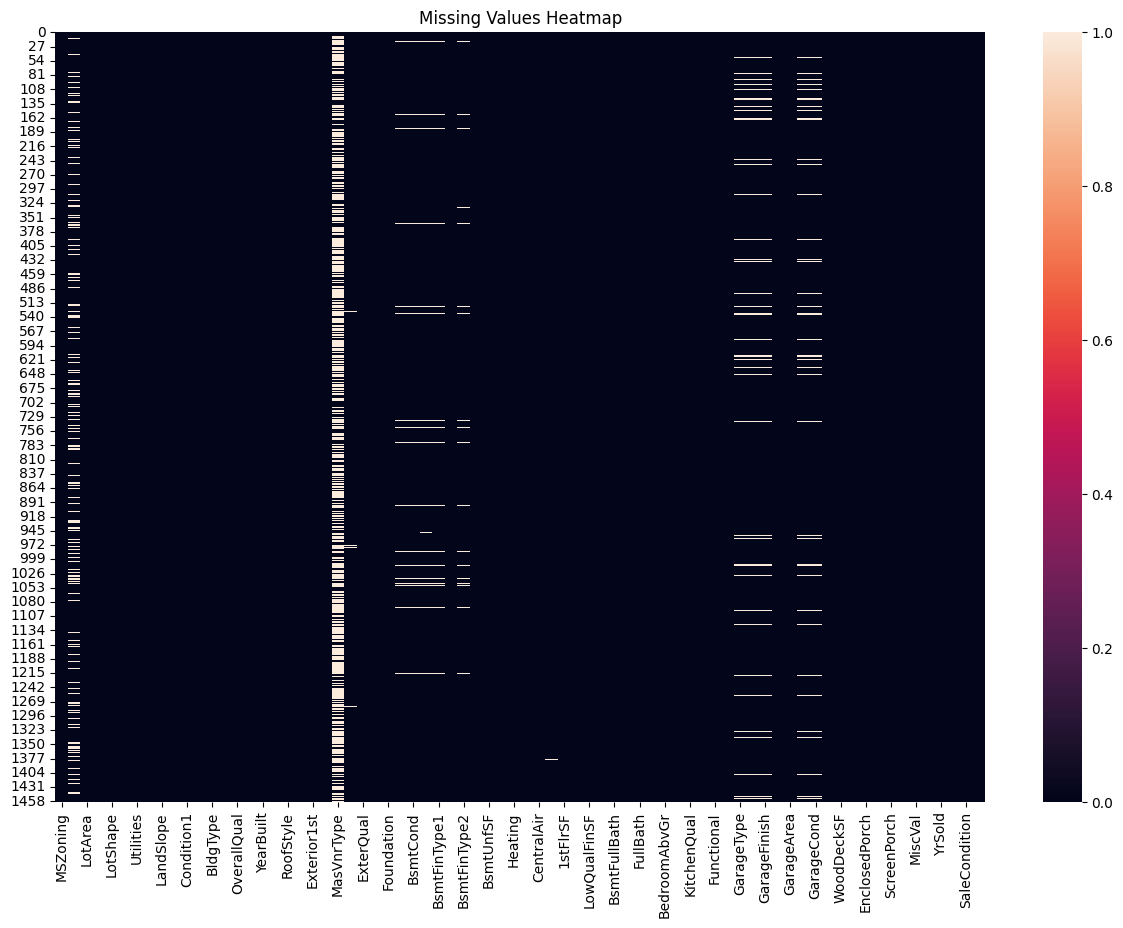

In [90]:
# plotting a heatmap for missing values
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.show()

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [91]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')


no missing values


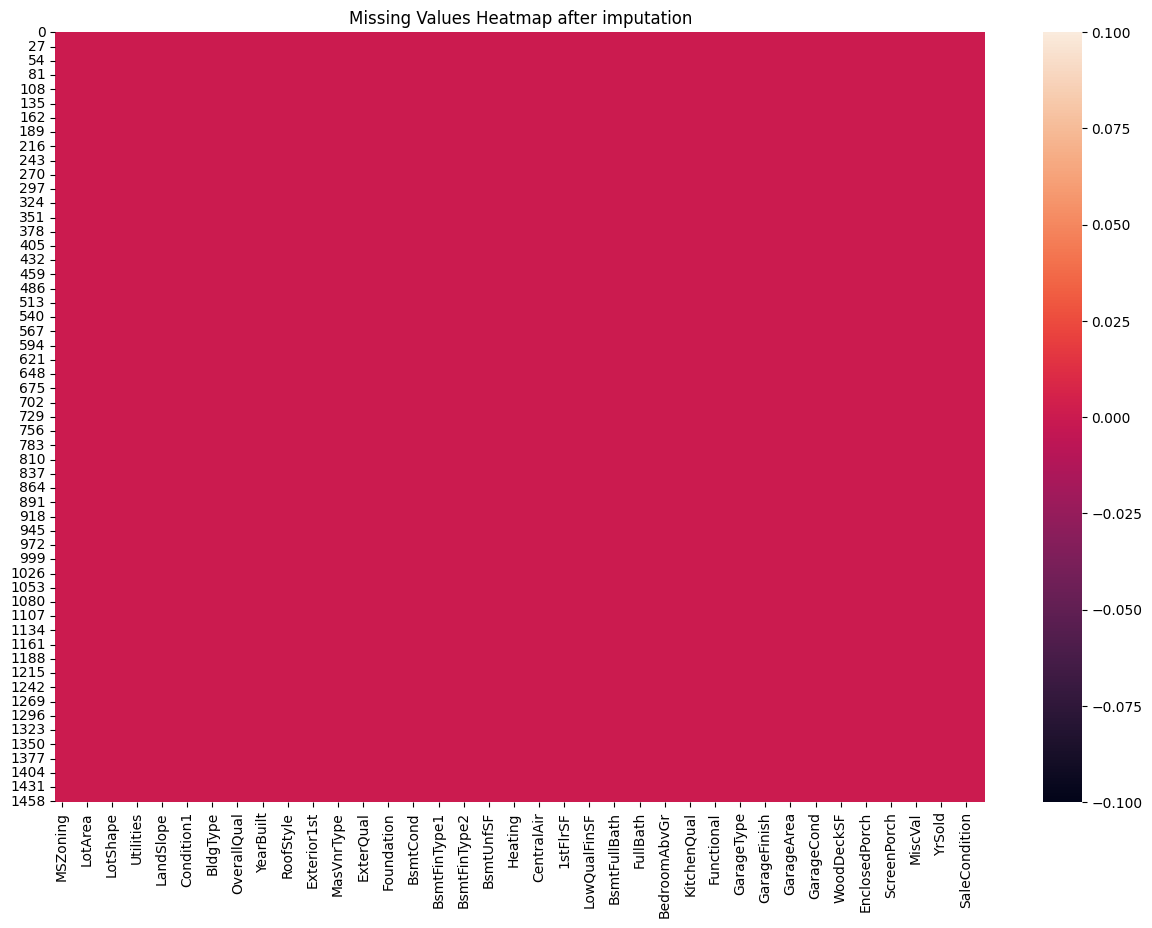

np.int64(0)

In [92]:
print("no missing values")
# plotting a heatmap for missing values after imputation
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap after imputation')
plt.show()
df.isnull().sum().sum()

## Day 3: Feature Engineering + Encoding

Highly Skewed Features (|skewness| > 0.75):
MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64


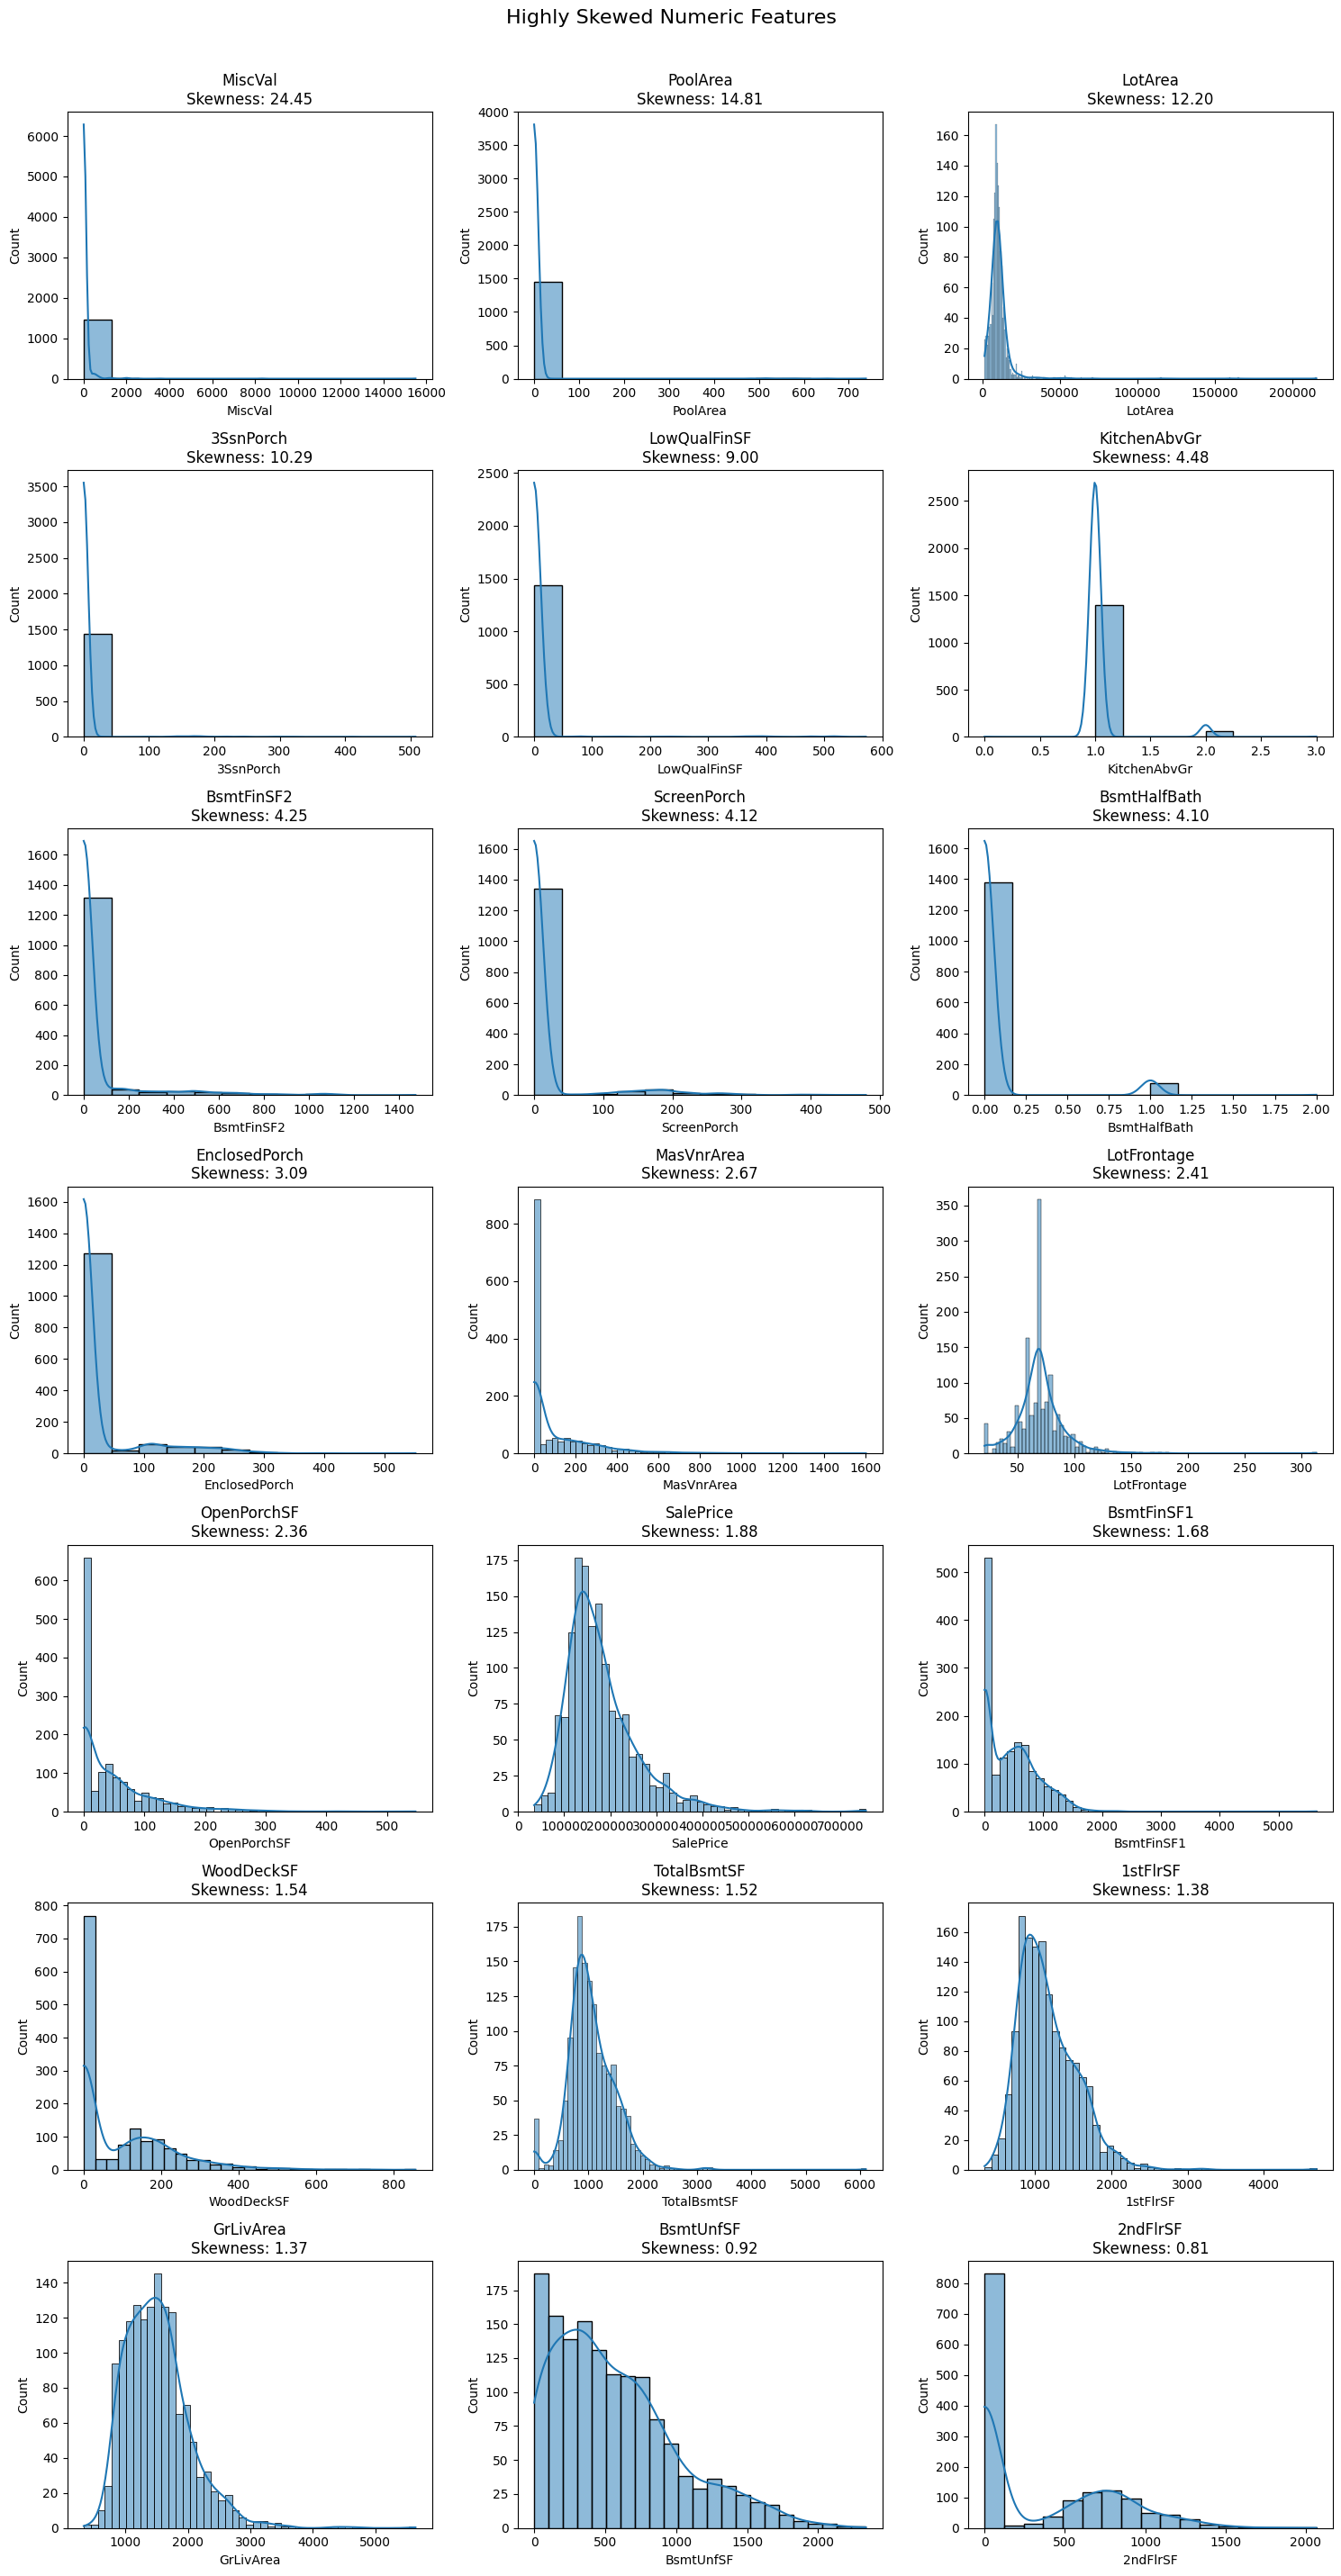

In [93]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate skewness
skewness_vals = df[numeric_cols].apply(lambda x: skew(x.dropna()))
skewed_cols = skewness_vals[abs(skewness_vals) > 0.75].sort_values(ascending=False)

# 📋 Print table of skewed features
print("Highly Skewed Features (|skewness| > 0.75):")
print(skewed_cols)

# 🎨 Plot distributions of only skewed features
n_cols = 3
n_rows = int(np.ceil(len(skewed_cols) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(skewed_cols.index):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col}\nSkewness: {skewed_cols[col]:.2f}")
    plt.tight_layout()

plt.suptitle("Highly Skewed Numeric Features", fontsize=16, y=1.02)
plt.show()


Skewed Columns (|skew| > 0.75):
MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64


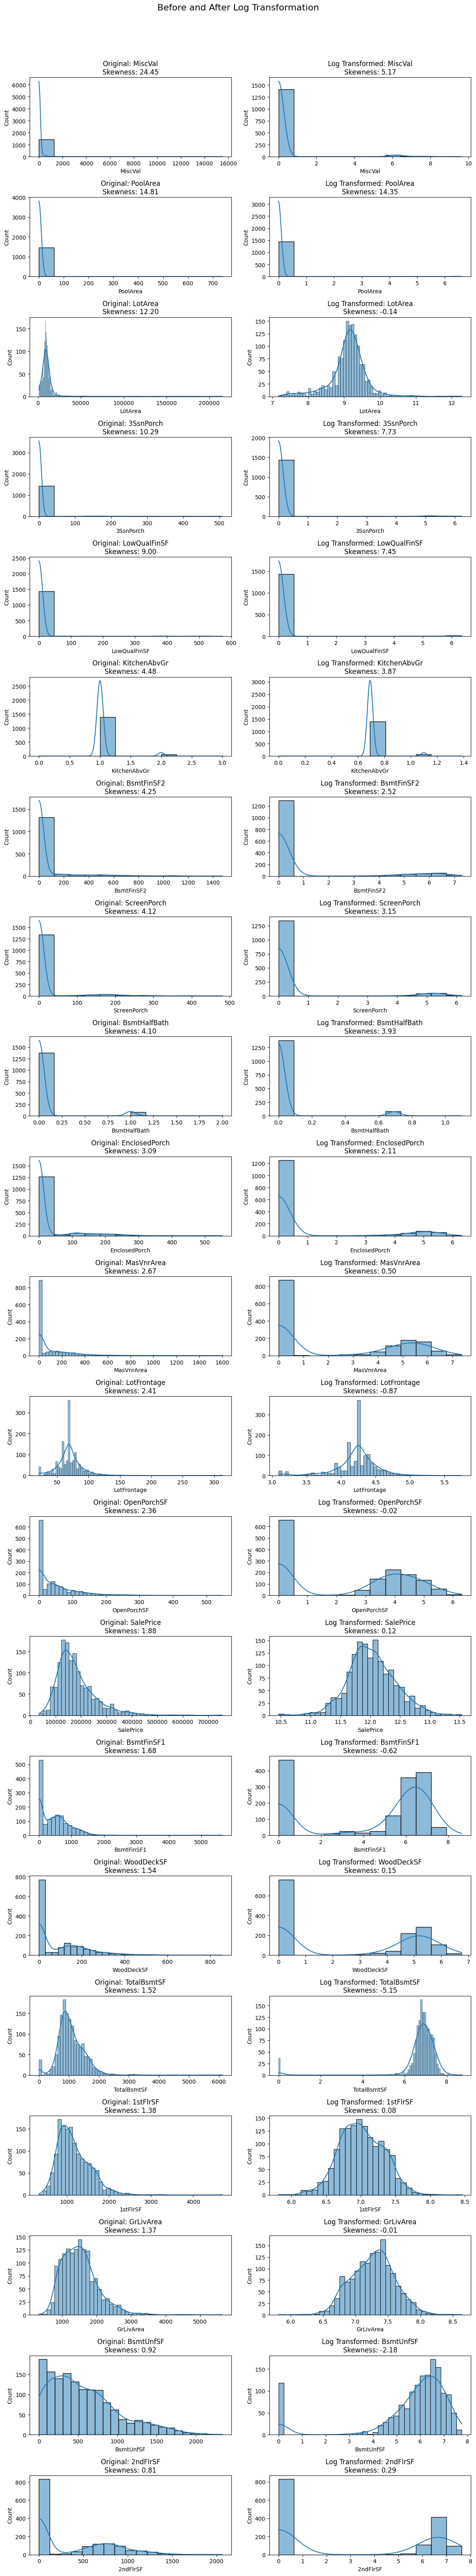

In [94]:
print("Skewed Columns (|skew| > 0.75):")
print(skewed_cols)

# Step 3: Apply log1p transformation to skewed columns
df_log_transformed = df.copy()
for col in skewed_cols.index:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Step 4: Plot original vs transformed distributions
n_cols = 2  # Original and Transformed
n_rows = len(skewed_cols)
plt.figure(figsize=(12, n_rows * 3))

for i, col in enumerate(skewed_cols.index):
    # Original
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(df[col].dropna(), kde=True)
    orig_skew = skew(df[col].dropna())
    plt.title(f"Original: {col}\nSkewness: {orig_skew:.2f}")

    # Transformed
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.histplot(df_log_transformed[col].dropna(), kde=True)
    trans_skew = skew(df_log_transformed[col].dropna())
    plt.title(f"Log Transformed: {col}\nSkewness: {trans_skew:.2f}")

plt.tight_layout()
plt.suptitle("Before and After Log Transformation", fontsize=16, y=1.02)
plt.show()

In [95]:
# Feature Scaling (Numerical Only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [96]:
# encoding all categorical or object datatype columns through Label Encoding
# Dictionary to store LabelEncoders for each column (optional)
label_encoders = {}

# Encode all object-type columns directly in df
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Encode and assign back to original df
    label_encoders[col] = le  # Store encoder if needed later

In [97]:
# using StandardScaler for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Day 4: Model Training (Basic Models)

In [98]:
# splitting the data into training and testing sets
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 73) (292, 73) (1168,) (292,)


In [99]:
# training the model through Linear Regression and printing the Accuracy
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy score through Linear Regression:", accuracy*100)

Accuracy score through Linear Regression: 84.88964252783849


In [100]:
# # training the model through Ridge Regression and printing the Accuracy
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy score through Ridge Regression:", accuracy*100)

Accuracy score through Ridge Regression: 84.89116710029771


In [105]:
# training the model through Lasso Regression and printing the Accuracy
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy score through Lasso Regression:", accuracy*100)

Accuracy score through Lasso Regression: -0.08824918802494697


In [103]:
# Evaluate using:RMSE, MAE, R² Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 1.2172748624581713
Root Mean Squared Error: 1.1033018002605504
Mean Absolute Error: 0.7879581496940793
R² Score: -0.0008824918802494697


In [110]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n Evaluation Metrics for {model_name}:")
    print(f"R² Score       : {r2:.4f} ({r2 * 100:.2f}%)")
    print(f"Mean Absolute Error (MAE) : {mae:.4f}")
    print(f"Mean Squared Error (MSE)  : {mse:.4f}")
    print(f"Root Mean Squared Error   : {rmse:.4f}")


In [111]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest Regressor")



📊 Evaluation Metrics for Random Forest Regressor:
R² Score       : 0.8920 (89.20%)
Mean Absolute Error (MAE) : 0.2230
Mean Squared Error (MSE)  : 0.1314
Root Mean Squared Error   : 0.3625


In [112]:
# Initialize and train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
gb_pred = gb_model.predict(X_test)
evaluate_model(y_test, gb_pred, "Gradient Boosting Regressor")



📊 Evaluation Metrics for Gradient Boosting Regressor:
R² Score       : 0.8989 (89.89%)
Mean Absolute Error (MAE) : 0.2185
Mean Squared Error (MSE)  : 0.1229
Root Mean Squared Error   : 0.3506


In [113]:
# Initialize and train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
evaluate_model(y_test, xgb_pred, "XGBoost Regressor")



📊 Evaluation Metrics for XGBoost Regressor:
R² Score       : 0.9152 (91.52%)
Mean Absolute Error (MAE) : 0.2080
Mean Squared Error (MSE)  : 0.1031
Root Mean Squared Error   : 0.3211


In [114]:
# Initialize and train LightGBM
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
lgb_pred = lgb_model.predict(X_test)
evaluate_model(y_test, lgb_pred, "LightGBM Regressor")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3146
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 68
[LightGBM] [Info] Start training from score 0.006552

📊 Evaluation Metrics for LightGBM Regressor:
R² Score       : 0.8885 (88.85%)
Mean Absolute Error (MAE) : 0.2151
Mean Squared Error (MSE)  : 0.1355
Root Mean Squared Error   : 0.3682


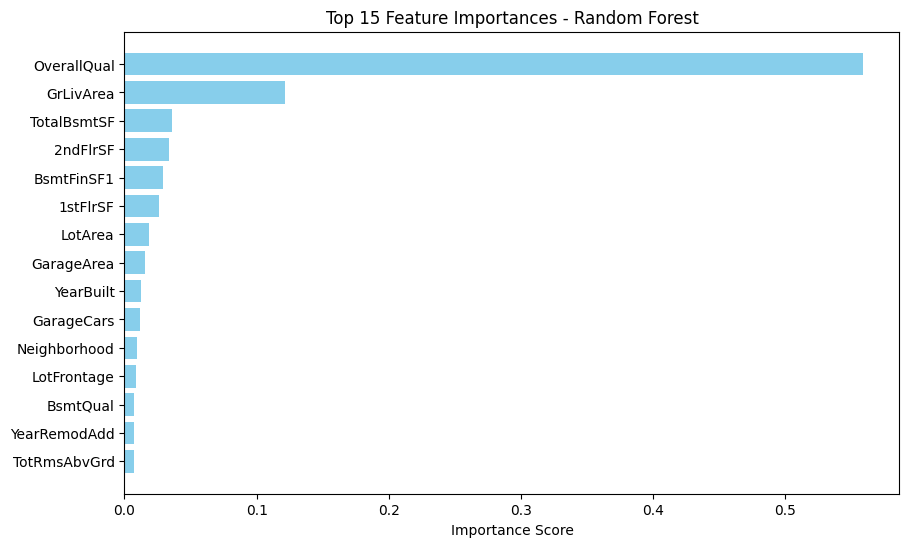

In [115]:
# Plot feature importance for Random Forest
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[-15:]  # top 15

plt.figure(figsize=(10,6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.barh(range(len(indices)), importances[indices], color="skyblue")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()
